## Meta Data

### DATA Description

- video_id	영상의 비디오 아이디
- channel_id	영상이 업로드 되어있는 채널 아이디
- published_date	영 상이 유튜브에 업로드된 날짜
- category_name	영상/채널의 카테고리
- duration	영상 길이 (PT1H13M25S == 1시간13분25초)
- tags	영상에 사용된 해시태그
- description	영상부연설명
- on_trending_date	인기 동영상에서 처음 포착된 날짜
- off_trending_date	인기 동영상에서 사라진 날짜
- on_rank	인기 동영상에서 처음 기록된 순위
- off_rank	인기 동영상에서 사라지기전 기록된 순위
- on_views	인기 동영상에서 처음 기록된 조회수
- off_views	인기 동영상에서 사라지기전 기록된 조회수
- on_likes	인기 동영상에서 처음 기록된 좋아요수
- off_likes	인기 동영상에서 사라지기전 기록된 좋아요수
- on_dislikes	인기 동영상에서 처음 기록된 싫어요수
- off_dislikes	인기 동영상에서 사라지기전 기록된 싫어요수
- on_comments	인기 동영상에서 처음 기록된 댓글수
- off_comments	인기 동영상에서 사라지기전 기록된 댓글수
- on_channel_subscribers	인기 동영상에서 처음 기록된 채널의 구독자수
- off_channel_subscribers	인기 동영상에서 사라지기전 기록된 채널의 구독자수
- on_channel_total_views	인기 동영상에서 처음 기록된 채널의 전체 비디오 조회수의 합
- off_channel_total_views	인기 동영상에서 사라지기전 기록된 채널의 전체 비디오
조회수의 합
- on_channel_total_videos	인기 동영상에서 처음 기록된 채널의 비디오 개수
- off_channel_total_videos	인기 동영상에서 사라지기전 기록된 채널의 비디오 개수

### TASK

## EDA & Preprocess

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; 
warnings.filterwarnings(action='ignore')


# warning 삭제용
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/pretest_data.csv')
df.head()

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,...,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,...,121,154,1083,1173,627000,628000,75327083,75685030,70,70
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22,1,...,162,233,696,1006,5750000,5750000,5424167911,5431617741,34270,34341
3,V-5ip,CHUQVGX,2021-06-02,Sports,PT6M40S,News Network|SBS SPORTSMUG|SPORTSMUG|스포츠머그|축구|...,세계 최초 9회 연속 올림픽 본선 진출! 그동안 한국 축구의 역사를 써내려 간 올림...,2021-06-04,2021-06-04,18,...,30,30,416,416,94200,94200,71160125,71160125,224,224
4,V-5jn,CHhI3EX,2021-07-06,Sports,PT11M27S,이천수|심판도전기|축구심판,찾아 뵐 심판분들이 이제 18명정도 남았네요,2021-07-08,2021-07-09,11,...,112,143,687,772,47600,49200,6993451,7607123,21,21


In [3]:
# 

df['published_date'] = pd.to_datetime(df['published_date'])

In [4]:
# month, year column 
#df['month'] = df['published_date'].dt.month
#df['year'] = df['published_date'].dt.year
df['year_month'] = df['published_date'].dt.strftime('%Y-%m')

pd.unique(df['year_month'])

array(['2021-07', '2021-06', '2021-04', '2021-05', '2021-03'],
      dtype=object)

In [ ]:
# string matching

import sys

str_list = []

# 
n = int(sys.stdin.readline())

for i in range(n):
    str_list.append(list(map(int,sys.stdin.readLine().split())))

# number of matching strings

n_match = int(sys.stdin.readline())

match_list = []

for i in range(n_match):
    match_list.append(list(map(int,sys.stdin.readline().split())))


# Q1
def str_match(match_list,str_list):
    for i in match_list:
            res = ["YES" if j in i else "NO" for j in str_list]
            print(" ".join(res))




### 중복 record 처리

In [5]:
### 주요변수 선택

df[['video_id','channel_id','category_name']].describe()

,video_id,channel_id,category_name
count,2644,2644,2644
unique,2643,940,15
top,VBSBm,CHQ2O-i,Entertainment
freq,2,17,954


- video_id의 unique value가 전체 count 보다 1개 모자라므로 video_id가 중복된 것으로 보임 

In [6]:
df[df.duplicated(['video_id'])]

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos,year_month
535,VBSBm,CHF4Wxd,2021-07-09,News & Politics,PT1M56S,MBC|MBC뉴스|뉴스데스크|newsdesk|뉴스투데이|newstoday|8시뉴스|...,전남 순천의 한 어린이집에서 원생을 마중 나온 선생님이 경사로에 밀린 학부모의 차량...,2021-07-11,2021-07-14,3,...,765,16067,17655,1430000,1440000,3130819202,3151554338,112154,112456,2021-07


In [98]:
df[df['video_id']=='VBSBm']

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos,month,year,year_month
534,VBSBm,CH0VR2v,2021-05-07,Entertainment,PT11M6S,요리|레시피|육식|고기|육식맨|고기요리|YOOXICMAN|짜장면|자장면|짜장|고기짜...,"※ 오늘 영상에 등장하는 모든 식재료, 조리도구, 업장, TV프로그램, 브랜드, 서...",2021-05-09,2021-05-10,40,...,1568,652000,652000,94094934,94383615,90,90,5,2021,2021-05


video_id가 중복된 두 레코드가 내용상 서로 다르기에 이후 분석은 아래쪽 레코드의 video_id값을 변경하여 진행함


In [7]:
cond = (df['video_id']=='VBSBm') & (df['category_name']=='News & Politics')
df.loc[cond,'video_id'] = 'VBSBm_News_Politics'

In [100]:
df[['video_id','channel_id','category_name']].describe()

,video_id,channel_id,category_name
count,2644,2644,2644
unique,2644,940,15
top,V-0db,CHQ2O-i,Entertainment
freq,1,17,954


In [8]:
df[cond]

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos,year_month
535,VBSBm_News_Politics,CHF4Wxd,2021-07-09,News & Politics,PT1M56S,MBC|MBC뉴스|뉴스데스크|newsdesk|뉴스투데이|newstoday|8시뉴스|...,전남 순천의 한 어린이집에서 원생을 마중 나온 선생님이 경사로에 밀린 학부모의 차량...,2021-07-11,2021-07-14,3,...,765,16067,17655,1430000,1440000,3130819202,3151554338,112154,112456,2021-07


## Q1 Visualization

### Ideation

- 카테고리단위 로 나눠서 채널별 차트 생성
- 색상은 기본차트 제외 다른 걸로

### Q1-1 전체 카테고리 채널-> 비디오 개수

- Q1. 데이터 타입별 시각화 (자유양식) 
  - 전체기간 카테고리->채널->비디오 개수
  - 월별 카테고리->채널->비디오 개수
  - 월별 TOP10 채널 (분류 기준은 비디오 개수)
  - 주별 TOP5 채널 (분류 기준은 비디오 개수)
  - 월별 카테고리별 태그 키워드 순위
- Q2. 각각의 비디오는 시청자의 호응도(engagement)를 판단할수 있는 객관적인 지표들이
있음
ex) views, likes, dislikes, comments,...
  - 비디오를 인기 동영상 기준에 부합하도록 분류할수 있는 새로운 지표를 개발하고
  - 이 지표를 사용하여 engagement 와 어떤 상관관계가 있는지 설명하시오.

In [117]:
# make class 
import plotly.express as px

#fig = px.bar(q1_1, y='video_id',x='channel_id' ,color='category_name',orientation='v',barmode='stack')


class YoutubeViz():
    def __init__(self,df):
        self.df = df
        self.df['published_date'] = pd.to_datetime(self.df['published_date'])
        self.df['week_num'] = self.df['published_date'].dt.week
        self.q1_1 = self.df[['video_id','category_name','channel_id','week_num']].groupby(['category_name','channel_id']). \
            count().\
            sort_values(by='video_id',ascending=False).\
            reset_index(drop=False)
        
    def get_video_id(self):
        return self.df['video_id']
    
    def get_channel_id(self):
        return self.df['channel_id']
    
    # 카테고리별 채널별 비디오 개수
    def solve_q1_1(self):
        fig = px.bar(self.q1_1, y='video_id',x='channel_id' ,color='category_name',
                     orientation='v',barmode='stack',
                     color_discrete_sequence=px.colors.qualitative.Dark24)
        fig.update_layout(title_text='Video Count by Category and Channel',
                        xaxis_title='Channel',
                        yaxis_title='Video Count',
                        width=1600,
                        height=800)
            
        return fig
    
    # 월멸 카텍고리별 채널별 비디오 개수
    def solve_q1_2(self):
        fig = px.bar(self.q1_1, y='video_id',x='channel_id' ,color='category_name',facet_row="year_month",
                     orientation='v',barmode='stack',facet_col_wrap=2,
                     color_discrete_sequence=px.colors.qualitative.Dark24)

        fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
        fig.for_each_yaxis(lambda y: y.update(title='Video Count'))
        fig.update_layout(title_text='Video Count by Category and Channel by Month',
                        xaxis_title='Channel',
                        yaxis_title='Video Count',
                        width=1600,
                        height=800)
        return fig
    
    def solve_q1_1_new(self):
        fig = px.bar(self.q1_1, y='video_id',x='channel_id' ,facet_row='category_name',
                     orientation='v',
                     color_discrete_sequence=px.colors.qualitative.Dark24)
        fig.update_xaxes(matches=None)
        fig.update_layout(title_text='Video Count by Category and Channel',
                        xaxis_title='Channel',
                        yaxis_title='Video Count',
                        width=1600,
                        height=800)
        
        return fig    
    # 월별 비디오 개수 기준 Top5 채널
    def solve_q1_3(self):
        top5=self.q1_1.sort_values(['year_month','video_id'],ascending=[True,False]).groupby('year_month'). \
            head(5)
        fig = px.bar(top5, y='video_id',x='channel_id' ,facet_col="year_month")
        fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
        fig.update_xaxes(showticklabels=True , matches=None)
        fig.update_layout(title_text='Top 5 Channel by Month',
                          yaxis_title='Video Count',
                          xaxis_title='Channel')
    
        return fig
        
    # 주별 비디오 개수 기준 Top5 채널
    def solve_q1_4(self):
        top5=self.q1_1.sort_values(['week_num','video_id'],ascending=[True,False]).groupby('week_num'). \
            head(5)
        fig = px.bar(top5, y='video_id',x='channel_id' ,facet_col="week_num")
        fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
        fig.update_xaxes(showticklabels=True , matches=None)
        fig.update_layout(title_text='Top 5 Channel by Week',
                          yaxis_title='Video Count',
                          xaxis_title=None)
        
        return fig

        
        


In [ ]:
fig.update_yaxes(showticklabels=True , matches=None)
fig.update_xaxes(showticklabels=True , matches=None)

In [121]:
temp_q1_1 = temp.q1_1

temp_q1_1

,category_name,channel_id,video_id,week_num
0,Entertainment,CHQ2O-i,17,17
1,Sports,CHtybqq,15,15
2,Entertainment,CHlzB2i,14,14
3,Comedy,CHmzMtX,14,14
4,People & Blogs,CHIG4gr,14,14
...,...,...,...,...
965,Gaming,CHpDtPd,1,1
966,Gaming,CHpYaDy,1,1
967,Gaming,CHta_NR,1,1
968,Gaming,CHuOUU4,1,1


In [77]:
# get weeknumber
import datetime
df['week_number'] = df['published_date'].dt.week
df['week_number'] 

0       26
1       25
2       28
3       22
4       27
        ..
2639    18
2640    30
2641    16
2642    17
2643    22
Name: week_number, Length: 2644, dtype: int64

In [60]:
"""
fig_q1_2 = px.bar(q1_2, y='video_id',x='channel_id' ,color='category_name',facet_row="year_month",orientation='v',barmode='stack',facet_col_wrap=2)
fig_q1_2.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig_q1_2.for_each_yaxis(lambda y: y.update(title='Video Count'))
fig_q1_2.update_layout(title_text='Video Count by Category and Channel',
                       xaxis_title='Channel',
                       width=1600,
                       height=800)
fig_q1_2.show()
"""

'\nfig_q1_2 = px.bar(q1_2, y=\'video_id\',x=\'channel_id\' ,color=\'category_name\',facet_row="year_month",orientation=\'v\',barmode=\'stack\',facet_col_wrap=2)\nfig_q1_2.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))\nfig_q1_2.for_each_yaxis(lambda y: y.update(title=\'Video Count\'))\nfig_q1_2.update_layout(title_text=\'Video Count by Category and Channel\',\n                       xaxis_title=\'Channel\',\n                       width=1600,\n                       height=800)\nfig_q1_2.show()\n'

In [118]:
temp = YoutubeViz(df)

fig_1 = temp.solve_q1_4()
fig_1.show()

In [ ]:
# get dictionary key = category, value = channel_id

for i in q1_1['category_name'].unique():
    
    


In [120]:
# cat

q1_1 = df[['video_id','category_name','channel_id']].groupby(['category_name','channel_id']). \
    count().\
    sort_values(by='video_id',ascending=False).\
    reset_index(drop=False)
q1_1

,category_name,channel_id,video_id
0,Autos & Vehicles,CH-IBt8,1
1,Autos & Vehicles,CHyF14S,1
2,Autos & Vehicles,CHs2TmE,1
3,Autos & Vehicles,CHrXkDA,2
4,Autos & Vehicles,CHrOl7I,3
...,...,...,...
965,Travel & Events,CHFCtZJ,2
966,Travel & Events,CH4KYnI,2
967,Travel & Events,CHlRNDV,7
968,Travel & Events,CHFw4M1,3


In [70]:
q1_2 = df[['video_id','category_name','channel_id','year_month']].groupby(['category_name','channel_id','year_month']). \
    count().\
    sort_values(by='video_id', ascending=False).\
    reset_index(drop=False)
q1_2

,category_name,channel_id,year_month,video_id
0,Sports,CHtybqq,2021-06,15
1,Entertainment,CHQ2O-i,2021-05,9
2,Sports,CHYRrUD,2021-07,8
3,People & Blogs,CHIG4gr,2021-05,7
4,People & Blogs,CHDV9zg,2021-05,7
...,...,...,...,...
1675,Entertainment,CHtDcEb,2021-04,1
1676,Entertainment,CHtCW8q,2021-04,1
1677,Entertainment,CHseQwR,2021-05,1
1678,Entertainment,CHsU2Rl,2021-07,1


In [91]:
#top 5 channel by month
top5=q1_2.sort_values(['year_month','video_id'],ascending=[True,False]).groupby('year_month'). \
    head(5)
print(top5.shape)
top5


(25, 4)


,category_name,channel_id,year_month,video_id
222,Entertainment,CHaKod3,2021-03,2
268,People & Blogs,CHnet0I,2021-03,2
370,People & Blogs,CHaZS_X,2021-03,2
432,Education,CHicKQU,2021-03,2
460,Entertainment,CH5BMQO,2021-03,2
11,Comedy,CHmzMtX,2021-04,6
13,Music,CHLkAep,2021-04,5
16,Entertainment,CHUyfkq,2021-04,5
17,Music,CHfkXDY,2021-04,5
19,People & Blogs,CHXTyJZ,2021-04,5


In [102]:
# visuzlize top5

fig_top5 = px.bar(top5, y='video_id',x='channel_id' ,facet_col="year_month")
fig_top5.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig_top5.update_xaxes(showticklabels=True , matches=None)
fig_top5.update_layout(title_text='Top 5 Channel by Month')

TypeError: 'AxesSubplot' object is not callable

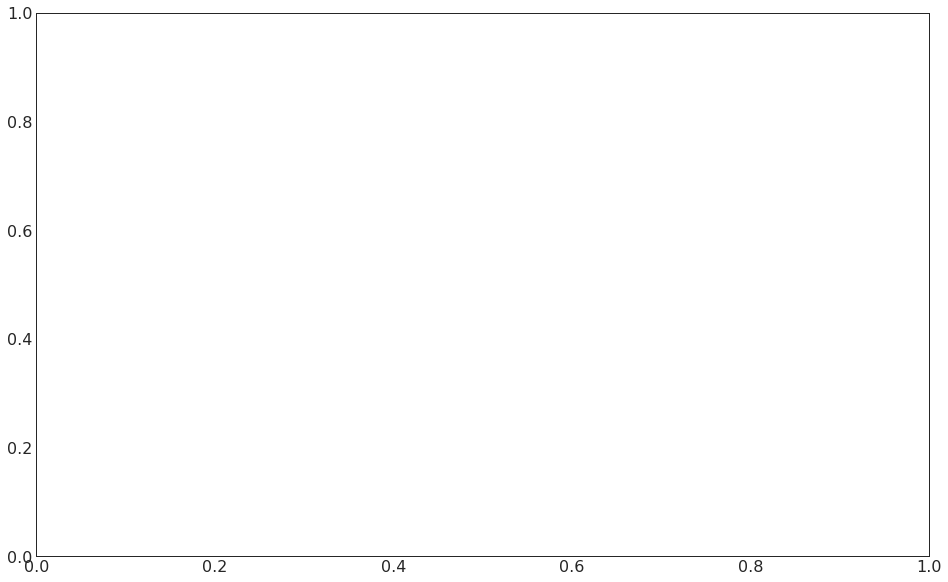

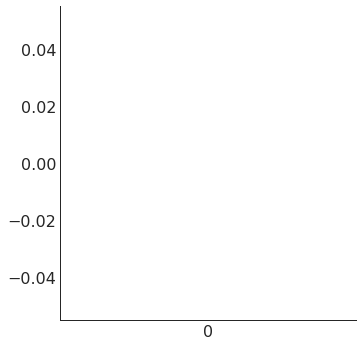

In [99]:
# top5 by month
# seaborn facetgrid
fig , ax = plt.subplots(figsize=(16,10))
sns.FacetGrid(q1_2,hue='year_month',size=5).map(sns.barplot(),'channel_id','video_id').add_legend()


In [82]:
q1_2[q1_2['year_month']=='2021-04']

,category_name,channel_id,year_month,video_id
11,Comedy,CHmzMtX,2021-04,6
13,Music,CHLkAep,2021-04,5
16,Entertainment,CHUyfkq,2021-04,5
17,Music,CHfkXDY,2021-04,5
19,People & Blogs,CHXTyJZ,2021-04,5
...,...,...,...,...
1664,Entertainment,CHuw1hx,2021-04,1
1669,Entertainment,CHtkQiK,2021-04,1
1673,Entertainment,CHtckgm,2021-04,1
1675,Entertainment,CHtDcEb,2021-04,1


- 차트 
- 요약통계량
- 

In [142]:
# 

calc_list = ['size','mean','max','min']


q1_1_agg = q1_1.groupby(['category_name']).agg({'video_id':calc_list}). \
    reset_index(drop=False). \
    round(2)
q1_1_agg_2 = q1_1.groupby(['category_name','channel_id']).agg({'video_id':calc_list}).round(2)
q1_1_agg

category_name video_id              
                              size  mean max min
0        Autos & Vehicles       19  1.63   3   1
1                  Comedy       50  3.34  14   1
2               Education       27  2.41  10   1
3           Entertainment      312  3.06  17   1
4        Film & Animation       27  2.74  13   1
5                  Gaming       47  1.70   7   1
6           Howto & Style       44  2.70   8   1
7                   Music       98  2.39  13   1
8         News & Politics       56  2.89  11   1
9   Nonprofits & Activism        1  1.00   1   1
10         People & Blogs      166  2.48  14   1
11         Pets & Animals       27  2.41   6   1
12   Science & Technology       20  1.80   7   1
13                 Sports       66  3.36  15   1
14        Travel & Events       10  2.30   7   1

In [145]:
# remove stacked column
q1_1_agg.columns = [' '.join(col).strip() for col in q1_1_agg.columns.values]
q1_1_agg.columns = ['category_name'] + ['count','mean','max','min']
q1_1_agg.sort_values(by='count',ascending=False)

,category_name,count,mean,max,min
3,Entertainment,312,3.06,17,1
10,People & Blogs,166,2.48,14,1
7,Music,98,2.39,13,1
13,Sports,66,3.36,15,1
8,News & Politics,56,2.89,11,1
1,Comedy,50,3.34,14,1
5,Gaming,47,1.70,7,1
6,Howto & Style,44,2.70,8,1
2,Education,27,2.41,10,1
4,Film & Animation,27,2.74,13,1


In [148]:
# table
fig_table = go.Figure(data=[go.Table(
    header=dict(values=list(q1_1_agg.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[q1_1_agg[k].tolist() for k in q1_1_agg.columns],
            fill_color='lavender',
            align='left'))])


In [155]:
import plotly.express as px

fig = px.bar(q1_1, y='video_id',x='channel_id' ,color='category_name',orientation='v',barmode='stack')
fig.show()

In [36]:
fig_q1_2 = px.bar(q1_2, y='video_id',x='channel_id' ,color='category_name',facet_row="year_month",orientation='v',barmode='stack',facet_col_wrap=2)
fig_q1_2.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig_q1_2.for_each_yaxis(lambda y: y.update(title='Video Count'))
fig_q1_2.update_layout(title_text='Video Count by Category and Channel',
                       xaxis_title='Channel',
                       width=1600,
                       height=800)
fig_q1_2.show()

In [31]:
# faceting 
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [79]:
from dash import dcc

In [87]:
## 여기다 그리기
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# bar
fig_1 = px.bar(q1_1, y='video_id',x='channel_id' ,color='category_name',orientation='v',barmode='stack')

# table
fig_2 = go.Figure(data=[go.Table(
    header=dict(values=list(q1_1_agg.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[q1_1_agg[k].tolist() for k in q1_1_agg.columns],
            fill_color='lavender',
            align='left'))])


fig_1_trace = []

for trace in range(len(fig_1["data"])):
    fig_1_trace.append(fig_1["data"][trace])



this_fig = make_subplots(rows=2, cols=1, 
                    vertical_spacing=0.5,
                    specs=[
                        [{"type": "bar"}],
                        [{"type": "table"}]
                    ]
)

for traces in fig_1_trace:
    this_fig.append_trace(traces, row=1, col=1)

this_fig.append_trace(fig_2["data"][0], row=2, col=1)


final = dcc.Graph(figure=this_fig)


this_fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

#q1_1_agg

fig_1 = go.Figure(data=[go.Table(
    header=dict(values=list(q1_1_agg.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[q1_1_agg[k].tolist() for k in q1_1_agg.columns],
            fill_color='lavender',
            align='left'))])

fig.show()

In [67]:
import plotly.express as px

fig = px.bar(q1_1[q1_1['category_name']=='Entertainment'], y='video_id',x='channel_id' ,color='category_name',orientation='v')
fig.show()

In [73]:
# make subplots with tables
"""
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1, 
                    vertical_spacing=0.05,
                    specs=[
                        [{"type": "bar"}],
                        [{"type": "table"}]
                    ]
)

# px.bar(q1_1, y='video_id',x='channel_id' ,color='category_name',orientation='v',barmode='stack')

fig.add_traces(go.Bar(y=q1_1['video_id'],x=q1_1['channel_id'] ,color=q1_1['category_name'],orientation='v',barmode='stack'),
            row=1, col=1)

# q1_1_summarize
fig.add_trace(go.Table(
    header=dict(values=list(q1_1_summarize.columns,
                            align='left'),
    cells=dict(values=[q1_1_summarize[k].tolist() for k in q1_1_summarize.columns[0:]],
            aling='left')),
    row=2, col=1))
"""

'\nimport plotly.graph_objects as go\nfrom plotly.subplots import make_subplots\n\nfig = make_subplots(rows=2, cols=1, \n                    vertical_spacing=0.05,\n                    specs=[\n                        [{"type": "bar"}],\n                        [{"type": "table"}]\n                    ]\n)\n\n# px.bar(q1_1, y=\'video_id\',x=\'channel_id\' ,color=\'category_name\',orientation=\'v\',barmode=\'stack\')\n\nfig.add_traces(go.Bar(y=q1_1[\'video_id\'],x=q1_1[\'channel_id\'] ,color=q1_1[\'category_name\'],orientation=\'v\',barmode=\'stack\'),\n            row=1, col=1)\n\n# q1_1_summarize\nfig.add_trace(go.Table(\n    header=dict(values=list(q1_1_summarize.columns,\n                            align=\'left\'),\n    cells=dict(values=[q1_1_summarize[k].tolist() for k in q1_1_summarize.columns[0:]],\n            aling=\'left\')),\n    row=2, col=1))\n'

In [64]:
# make subplots with tables

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=8, cols=2, 
                    vertical_spacing=0.05,
                    specs=[
                        [{"type": "bar"}],
                        [{"type": "table"}]
                    ]
)

#bar1 = px.bar(q1_1, y='video_id',x='channel_id' ,color='category_name',orientation='v',barmode='stack')

#for trace in bar1.data:
#    fig.add_trace(trace, row=1, col=1)








# q1_1_summarize
fig.add_trace(go.Table(
    header=dict(values=list(q1_1_summarize.columns),
                            align='left'),
    cells=dict(values=[q1_1_summarize[k].tolist() for k in q1_1_summarize.columns[0:]],
            align='left')),row = 2, col=1)

In [15]:
pd.unique(q1_1['channel_id']).shape

(940,)

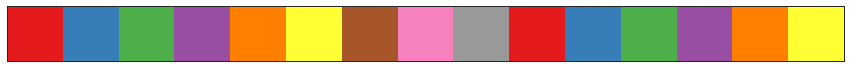

In [93]:
### 그림 설정 

# 색상 설정
color_cat = sns.color_palette("Set1", 15)
sns.palplot(color_cat)

In [47]:
ax 

<AxesSubplot:title={'center':'Video Count per Categories'}, xlabel='Video Count', ylabel='Category'>

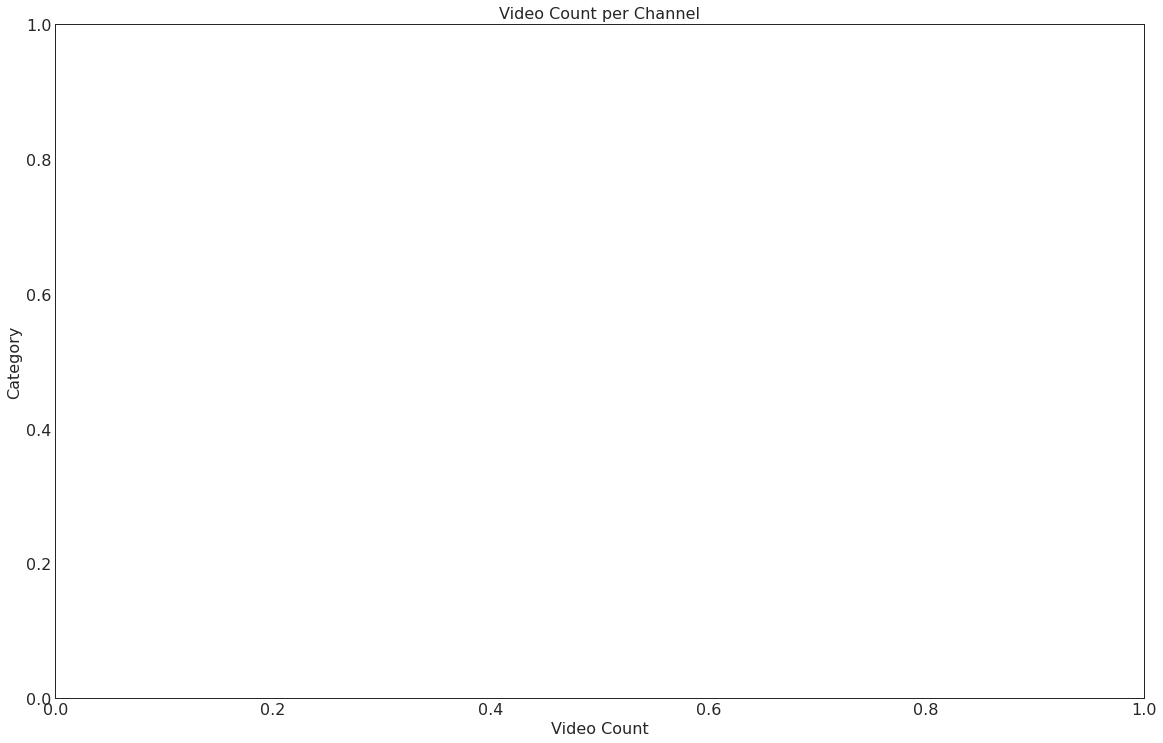

In [48]:
fig2, ax2 = plt.subplots(figsize=(16,10))
sns.set_palette(qualitative_colors)
sns.barplot(x=q1_1['video_id'], y=q1_1.index, ax=ax, orient='h')
ax.bar_label(ax.containers[0], label_type='edge')  # bar label 추가
plt.tight_layout()
# label
plt.gca().set(title='Video Count per Channel',xlabel='Video Count', ylabel='Category')
plt.show()

In [49]:
ax2

<AxesSubplot:title={'center':'Video Count per Channel'}, xlabel='Video Count', ylabel='Category'>